<a href="https://colab.research.google.com/github/thiagoteles10/acidentes_aeronauticos/blob/main/acidentes_aeron%C3%A1uticos(parte_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import missingno

In [ ]:
df = pd.read_csv('aircrafts.csv', encoding='latin-1')

## **Verificando quais informações o dataframe possui**

In [ ]:
df.head(5)

,Unnamed: 0,aircraft_id,occurrence_id,registration,operator_id,equipment,manufacturer,model,engine_type,engines_amount,...,registration_country,registration_category,registration_aviation,origin_flight,destination_flight,operation_phase,type_operation,damage_level,fatalities_amount,extraction_day
0,0,4,45602,PPGXE,241,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,...,BRAZIL,PRI,INSTRUCTION,SDPW,SDPW,UNKNOWN,INSTRUCTION,SUBSTANTIAL,NaN,2016-07-30
1,1,40,53551,PPGSZ,160,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,...,BRAZIL,PRI,INSTRUCTION,SBBP,SBBP,TAKEOFF,INSTRUCTION,LIGHT,NaN,2016-07-30
2,2,118,43721,PTCMT,1232,AIRPLANE,BEECH AIRCRAFT,95-B55,PISTON,2.0,...,BRAZIL,TPX,AEROTAXI,****,****,RUN AFTER LANDING,AEROTAXI,SUBSTANTIAL,NaN,2016-07-30
3,3,130,35556,PTEQI,3992,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTON,1.0,...,BRAZIL,TPP,PRIVATE,SNDU,SBSL,RUN AFTER LANDING,PRIVATE,LIGHT,NaN,2016-07-30
4,4,191,32579,PPVMM,4365,AIRPLANE,BOEING COMPANY,737-241,JET,2.0,...,BRAZIL,TPR,REGULAR,****,****,ASCENSION,REGULAR,NONE,NaN,2016-07-30


## **Deletando a coluna Unnamed**

In [ ]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

## **Verificando as colunas e os tipos**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   aircraft_id               2043 non-null   int64  
 1   occurrence_id             2043 non-null   int64  
 2   registration              2043 non-null   object 
 3   operator_id               2043 non-null   int64  
 4   equipment                 2042 non-null   object 
 5   manufacturer              2043 non-null   object 
 6   model                     2043 non-null   object 
 7   engine_type               2043 non-null   object 
 8   engines_amount            2034 non-null   float64
 9   takeoff_max_weight (Lbs)  2043 non-null   int64  
 10  seatings_amount           2025 non-null   float64
 11  year_manufacture          2039 non-null   float64
 12  registration_country      2031 non-null   object 
 13  registration_category     2043 non-null   object 
 14  registra

## **Dados faltantes**

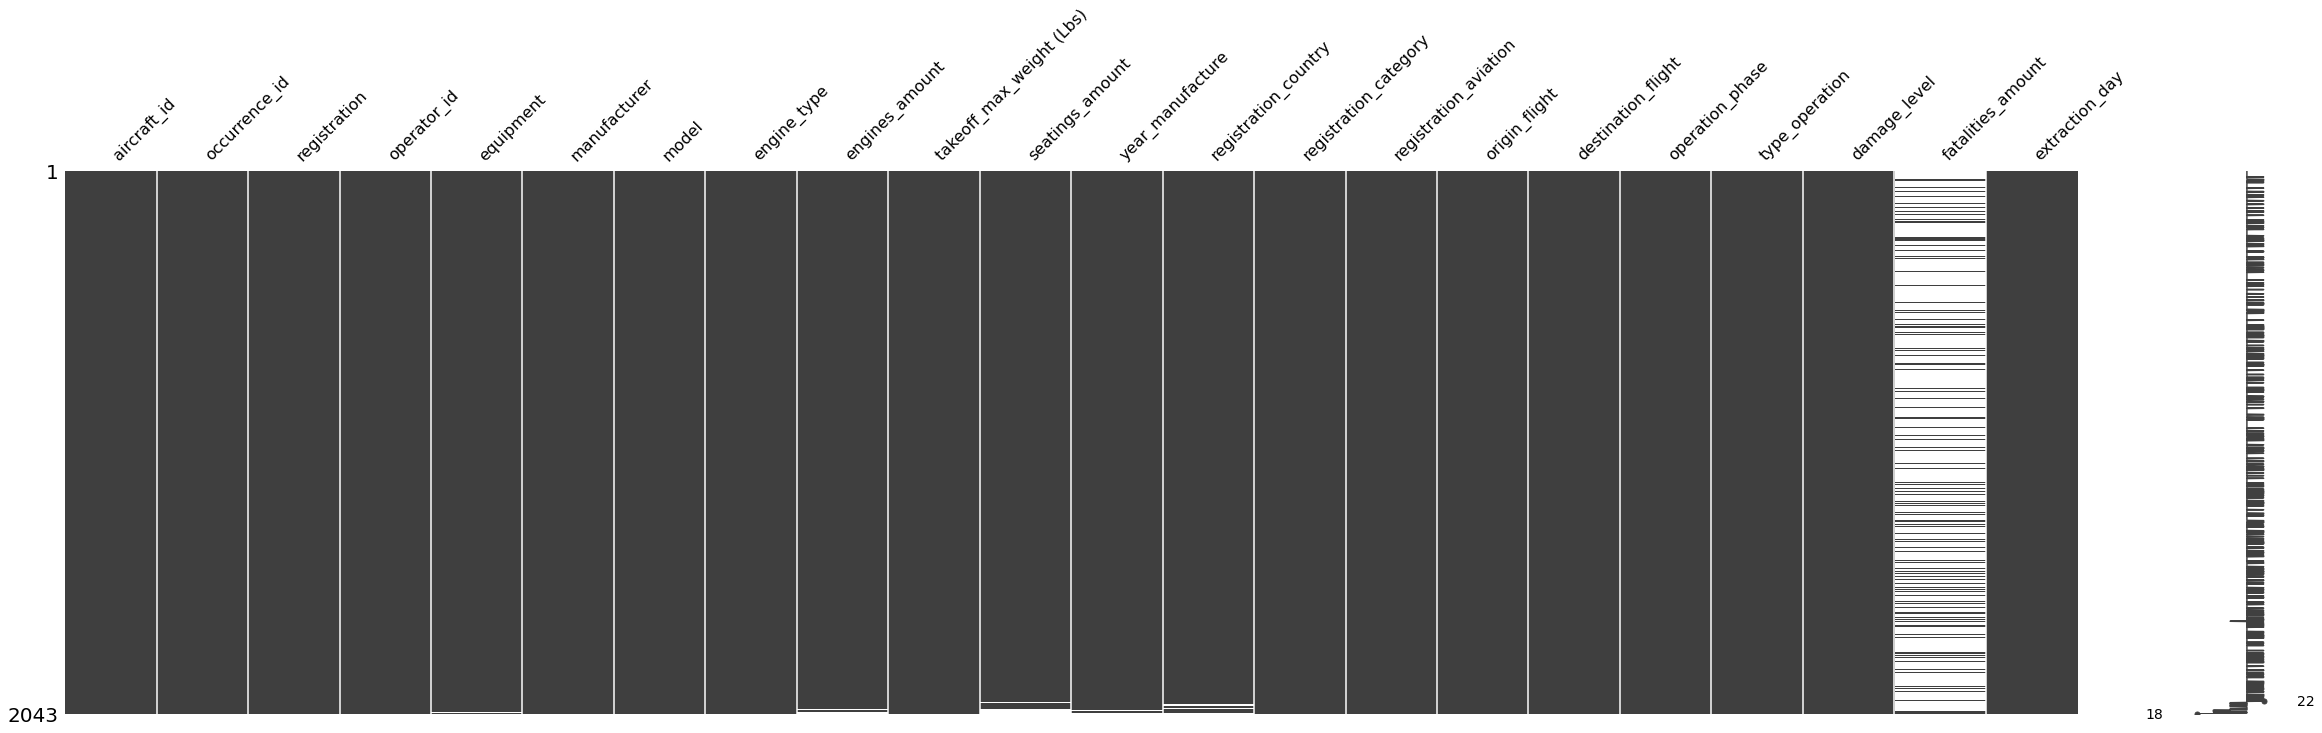

In [ ]:
missingno.matrix(df,figsize=(40,10))

### Verificamos uma quantidade significativa de dados faltantes na coluna fatalities_amount

## **Quantidade de valores nulos da coluna('fatalities_amount')**

In [ ]:
df['fatalities_amount'].isnull().sum()

1688

## **Verificando os nomes das colunas do dataframe**

In [ ]:
df.columns

Index(['aircraft_id', 'occurrence_id', 'registration', 'operator_id',
       'equipment', 'manufacturer', 'model', 'engine_type', 'engines_amount',
       'takeoff_max_weight (Lbs)', 'seatings_amount', 'year_manufacture',
       'registration_country', 'registration_category',
       'registration_aviation', 'origin_flight', 'destination_flight',
       'operation_phase', 'type_operation', 'damage_level',
       'fatalities_amount', 'extraction_day'],
      dtype='object')

## **verificando a quantidade por porcentagem de valores ausentes no df**

---



In [ ]:
df.isnull().sum() / df.shape[0] * 100

aircraft_id                  0.000000
occurrence_id                0.000000
registration                 0.000000
operator_id                  0.000000
equipment                    0.048948
manufacturer                 0.000000
model                        0.000000
engine_type                  0.000000
engines_amount               0.440529
takeoff_max_weight (Lbs)     0.000000
seatings_amount              0.881057
year_manufacture             0.195791
registration_country         0.587372
registration_category        0.000000
registration_aviation        0.000000
origin_flight                0.000000
destination_flight           0.000000
operation_phase              0.048948
type_operation               0.000000
damage_level                 0.000000
fatalities_amount           82.623593
extraction_day               0.000000
dtype: float64

### notamos que apenas a coluna fatalities amount tem 82.6% de dados faltantes.

## **Informações estatísticas**

In [ ]:
df.describe()

,aircraft_id,occurrence_id,operator_id,engines_amount,takeoff_max_weight (Lbs),seatings_amount,year_manufacture,fatalities_amount
count,2043.000000,2043.000000,2043.000000,2034.000000,2043.000000,2025.000000,2039.000000,355.000000
mean,12300.670093,43961.869799,3156.447871,1.244346,11750.045032,8.928889,1902.494850,3.208451
std,7654.268691,7857.658738,1645.351104,0.483653,48511.565643,26.922299,402.024605,13.367108
min,4.000000,25799.000000,13.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,9061.000000,38839.500000,1821.000000,1.000000,1860.000000,2.000000,1975.000000,1.000000
50%,11267.000000,45564.000000,3992.000000,1.000000,3600.000000,4.000000,1986.000000,2.000000
75%,13601.500000,50353.500000,3992.000000,2.000000,4750.000000,6.000000,1999.000000,2.000000
max,39147.000000,65312.000000,6270.000000,4.000000,630499.000000,301.000000,2015.000000,199.000000


## **Obtendo a quantidade de linhas e colunas de um dataframe**

In [ ]:
df.shape

(2043, 22)

In [ ]:
linhas, colunas = df.shape

## **Quais as 30 aeronaves com maior incidência de acidentes?**

In [ ]:
df_avioes = df['model'].value_counts().head(30)

In [ ]:
df_avioes

AB-115        111
EMB-202        78
EMB-201A       72
EMB-810C       61
EMB-810D       38
R44            35
58             34
EMB-202A       33
210L           31
A188B          30
152            30
EMB-711C       28
R22 BETA       28
R44 II         28
206B           26
EMB-201        25
EMB-720D       25
CAP-4          24
PA-25-235      23
AS 350 B2      23
R22            22
PA-34-220T     21
182P           19
EMB-712        18
56-C           18
EMB-721C       18
95-B55         17
SR22           17
EMB-711ST      17
EMB-720C       16
Name: model, dtype: int64

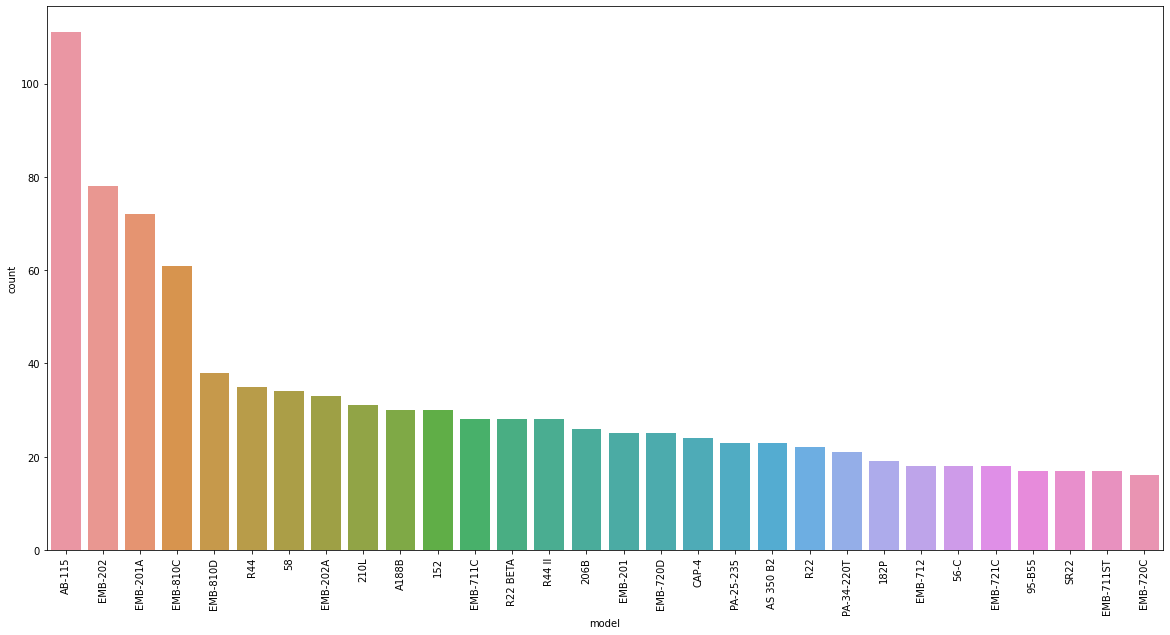

In [ ]:
plt.figure(figsize=(20,10));
sns.countplot(data=df, x='model', order=df_avioes.index);
plt.xticks(rotation=90);

## **Qual a porcentagem de incidência de acidentes aéreos com a aeronave AB-115 em comparação ao total de acidentes**

In [ ]:
acidentes_AB_115 = df['model'].value_counts()
media = ((acidentes_AB_115[0] / (df['model'].shape[0])) * 100).round()
print(f'os acidentes com a aeronave AB-115, correspondem a {media}% do total de acidentes')

os acidentes com a aeronave AB-115, correspondem a 5.0% do total de acidentes


## **Qual empresa é responsável pela fabricação do AB-115**

In [ ]:
empresa = df.loc[df['model'] == 'AB-115'].head(1)

In [ ]:
print(f"A empresa responsável pelo AB-115 É A {empresa.iloc[0,5]}")

A empresa responsável pelo AB-115 É A AERO BOERO


## **Substituindo os valores nulos da coluna ['fatalities amount'] por zero.**

In [ ]:
df ['fatalities_amount'] = df ['fatalities_amount'].fillna(0)

## **Número de óbitos em acidentes com a aeronave AB-115**

In [ ]:
ab_115 = df[['model','fatalities_amount']] # criando um dataframe com as colunas 'model' e 'fatalities_amount'


In [ ]:
AB_115 = ab_115.loc[ab_115['model']=='AB-115'] # criando um dataframe apenas com o modelo AB-115
    

In [ ]:
obitos_AB_115 = AB_115['fatalities_amount'].sum()

In [ ]:
print(f'A quantidades de óbitos em acidentes com a aeronave AB-115 foram: {obitos_AB_115}')

A quantidades de óbitos em acidentes com a aeronave AB-115 foram: 3.0


### Apesar de ser a aeronave com o maior número de acidentes, a AB-115 tem uma quantidade baixa de acidentes com vítimas fatais

## **Listando os 20 maiores acidentes por número de óbitos**

In [ ]:
df['fatalities_amount'].sort_values(ascending=False).head(20)

620     199.0
638     154.0
34       24.0
526      19.0
1210     16.0
866      14.0
33       10.0
1365      8.0
665       8.0
1414      8.0
1196      7.0
1746      7.0
626       7.0
1620      6.0
1110      6.0
730       6.0
446       6.0
596       6.0
32        6.0
1783      5.0
Name: fatalities_amount, dtype: float64

## **As 20 aeronaves envolvidas nos maiores acidentes aéreos do Brasil.**

In [ ]:
aeronaves = pd.DataFrame(df['fatalities_amount'].sort_values(ascending=False).head(20))

In [ ]:
lista=[]
for i in aeronaves['fatalities_amount']:
  if df.loc[df['fatalities_amount']== i].iloc[0,6]:
    modelo = df.loc[df['fatalities_amount']== i].iloc[0,6]
    lista.append(modelo)

print(f'A lista das 20 aeronaves envolvidas nos maiores acidentes aéreos do Brasil é: {lista}')   


A lista das 20 aeronaves envolvidas nos maiores acidentes aéreos do Brasil é: ['A320-233', '737-8EH', 'EMB-110P1', 'L410UVP-E20', 'L410UVP-E20', 'B300', 'EMB-820C CARAJA', '35A', '35A', '35A', 'EMB-810C', 'EMB-810C', 'EMB-810C', 'EMB-810C', 'EMB-810C', 'EMB-810C', 'EMB-810C', 'EMB-810C', 'EMB-810C', 'P35']


## **Qual modelo da aeronave que se envolveu no maior desastre aéreo do Brasil**

In [ ]:
maior_acidente = df.loc[df['fatalities_amount']==199].iloc[0,6]

In [ ]:
print(f'o modelo da aeronave que se envolveu no maior acidente foi: {maior_acidente}')

o modelo da aeronave que se envolveu no maior acidente foi: A320-233


## **Qual a quantidade de valores não nulos na coluna ('fatalities_amount')?**

In [ ]:
df['fatalities_amount'].notnull().sum()

2043

## **Quantidade total de vítimas fatais.**

In [ ]:
df['fatalities_amount'].sum() # uma maneira mais simples de fazer a soma das linhas da coluna 'fatalities_amount'

1139.0

## **Qual a quantidade máxima de peso que uma aeronave pode decolar?**

In [ ]:
df['takeoff_max_weight (Lbs)'].max()

630499

## **Qual o modelo e fabricante da aeronave que pode decolar com o maior peso?**

In [ ]:
modelo_aeronave = (df.loc[df['takeoff_max_weight (Lbs)'] == 630499 ]).iloc[0,6]

In [ ]:
print(f'a aeronave que decola com  a maior quantidade de peso é a aeronave {modelo_aeronave}')

a aeronave que decola com  a maior quantidade de peso é a aeronave MD11


## **A aeronave que carrega a menor quantidade de peso qual a quantidade de peso que ela pode decolar?**

In [ ]:
menor=[]
for i in df['takeoff_max_weight (Lbs)']:
  if i > 0:
    menor.append(i)
aeronave = min(menor)

In [ ]:
print(f'O máximo de  peso que essa aeronave pode decolar é {aeronave}kg')

O máximo de  peso que essa aeronave pode decolar é 458kg


## **Qual o modelo e fabricante da aeronave que decola com a menor quantidade de peso?**

In [ ]:
df.loc[df['takeoff_max_weight (Lbs)'] == 458 ]

,aircraft_id,occurrence_id,registration,operator_id,equipment,manufacturer,model,engine_type,engines_amount,takeoff_max_weight (Lbs),...,registration_country,registration_category,registration_aviation,origin_flight,destination_flight,operation_phase,type_operation,damage_level,fatalities_amount,extraction_day
1984,33745,53484,PUTOF,3992,UNKNOWN,***,***,UNKNOWN,0.0,458,...,BRAZIL,PET,EXPERIMENTAL,****,****,CRUISE,PRIVATE,SUBSTANTIAL,0.0,2016-07-30


Como foi mostrado acima, a aeronave que pode decolar com o menor
peso tem tanto o modelo como o fabricante desconhecido

## **Substituindo os valores 'NaN' de ['engines_amount'] por zero**

In [ ]:
df['engines_amount']= df['engines_amount'].fillna(0)

## **Qual o número máximo de motores que uma aeronave possui**

In [ ]:
motores=[]
for i in df['engines_amount']:
  if i >= 0:
    motores.append(i)
print(max(motores))

4.0


## **Substituindo os valores nulos da coluna 'registration_country'**

In [ ]:
df['registration_country']= df['registration_country'].fillna('')

## **Quais aeronaves possuem 4 motores?**

In [ ]:
df.loc[df['engines_amount'] == 4 ]

,aircraft_id,occurrence_id,registration,operator_id,equipment,manufacturer,model,engine_type,engines_amount,takeoff_max_weight (Lbs),...,registration_country,registration_category,registration_aviation,origin_flight,destination_flight,operation_phase,type_operation,damage_level,fatalities_amount,extraction_day
493,8969,31695,PPBRG,1000,AIRPLANE,BOEING COMPANY,707-323C,JET,4.0,327004,...,BRAZIL,TPN,NOT REGULAR,****,****,TAKEOFF,REGULAR,UNKNOWN,0.0,2016-07-30
2006,34556,34696,D2TEA,5886,AIRPLANE,BOEING COMPANY,747-312M,PISTON,4.0,0,...,,EXT,UNKNOWN,****,****,ASCENSION,UNKNOWN,SUBSTANTIAL,0.0,2016-07-30
2010,34568,40047,CSTOD,4844,AIRPLANE,AIRBUS INDUSTRIE,A340-541,JET,4.0,522494,...,,***,UNKNOWN,SBGL,SBGR,LANDING,REGULAR,NONE,0.0,2016-07-30
2011,34568,45252,CSTOD,4844,AIRPLANE,AIRBUS INDUSTRIE,A340-541,JET,4.0,522494,...,,EXT,UNKNOWN,****,****,TAKEOFF,UNKNOWN,LIGHT,0.0,2016-07-30


## **Quantas aeronaves são de uso privado?**

In [ ]:
privada = df.loc[df['registration_aviation']== 'PRIVATE']
print(len(privada))

760


In [ ]:
print(privada['model'])

3         EMB-721C
5             182P
6         EMB-711C
14      PA-28R-200
21             550
           ...    
2027    PA-32R-301
2028           ***
2031          210R
2032          210D
2038           ***
Name: model, Length: 760, dtype: object


## **Quantas aeronaves são de instrução?**

In [ ]:
instrucao = df.loc[df['registration_aviation']== 'INSTRUCTION']
print(len(instrucao))

370


In [ ]:
aeronaves_instrucao = []
for aeronave in instrucao['model']:
  aeronaves_instrucao.append(aeronave)
sorted(set(aeronaves_instrucao)) # removendo aeronaves repetidas da lista

## **Quantas aeronaves são de uso experimental?**

In [ ]:
experimental = df.loc[df['registration_aviation']== 'EXPERIMENTAL']
print(len(experimental))

202


In [ ]:
len(sorted(set(experimental['model']))) # retirando as aeronaves de uso experimental repetidas e fazendo a contagem

133

## **Quantas aeronaves são de uso agricultural?**

In [ ]:
agricultural = df.loc[df['registration_aviation']== 'AGRICULTURAL']
print(len(agricultural))

196


In [ ]:
len(sorted(set(agricultural['model']))) # retirando as aeronaves de uso agricultural repetidas e fazendo a contagem

21

In [ ]:
sorted(set(agricultural['model']))

## **Quantas aeronaves são de aerotaxi?**

In [ ]:
aerotaxi = df.loc[df['registration_aviation']== 'AEROTAXI']
print(len(aerotaxi))

272


In [ ]:
len(sorted(set(aerotaxi['model'])))

86

In [ ]:
sorted(set(aerotaxi['model']))

## **Quantas aeronaves são especializadas?**

In [ ]:
especializada = df.loc[df['registration_aviation']== 'SPECIALIZED']
print(len(especializada))

64


In [ ]:
len(sorted(set(especializada['model'])))

25

In [ ]:
sorted(set(aerotaxi['model']))

## **Quantas aeronaves são desconhecidas?**

In [ ]:
desconhecida = df.loc[df['registration_aviation']== 'UNKNOWN']
print(len(desconhecida))  

25


## **Quantas aeronaves possuem o registro irregular?**

In [ ]:
df.loc[df['registration_aviation']== 'NOT REGULAR']

## **Quantas aeronaves possuem registro desconhecido?**

In [ ]:
df.loc[df['registration_aviation']== 'UNKNOWN']

## **Verificando quantas aeronaves são de origem Americana**

In [ ]:
qtd_americana = df.loc[df['registration_country'] == 'USA' ]
print(len(qtd_americana))

22


## **Modelos das aeronaves americanas**

In [ ]:
df.loc[df['registration_country'] == 'USA' ]
